In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
fpaths = "../testes_seq_paral/test_staub_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

cpu_migrations = {}
cycles = {}

for i in sizes:
    for j in threads:
        cpu_migrations_local = []
        cycles_local = []
        paralelo_local = []
        # print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "cpu-migrations" in linha:
                    aux = linha.split("cpu-migrations")
                    aux = aux[0]
                    cpu_migrations_local.append(float(aux))
            aux = np.mean(cpu_migrations_local)
            aux = {f"{i}, {j}": cpu_migrations_local}
            cpu_migrations.update(aux)

dados = []
label = []
for i in cpu_migrations:
    if "small" not in i:
        dados.append(cpu_migrations[i])
        label.append(i)


dados_media = []

for i in dados:
    dados_media.append(np.mean(i))

In [63]:
fpaths = "../testes_seq_paral/test_greff_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

cpu_migrations = {}
cycles = {}

for i in sizes:
    for j in threads:
        cpu_migrations_local = []
        cycles_local = []
        paralelo_local = []
        # print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "cpu-migrations" in linha:
                    aux = linha.split("cpu-migrations")
                    aux = aux[0]
                    cpu_migrations_local.append(float(aux))
            aux = np.mean(cpu_migrations_local)
            aux = {f"{i}, {j}": cpu_migrations_local}
            cpu_migrations.update(aux)

dados = []
label2 = []
for i in cpu_migrations:
    if "small" not in i:
        dados.append(cpu_migrations[i])
        label2.append(i)


dados_media2 = []

for i in dados:
    dados_media2.append(np.mean(i))

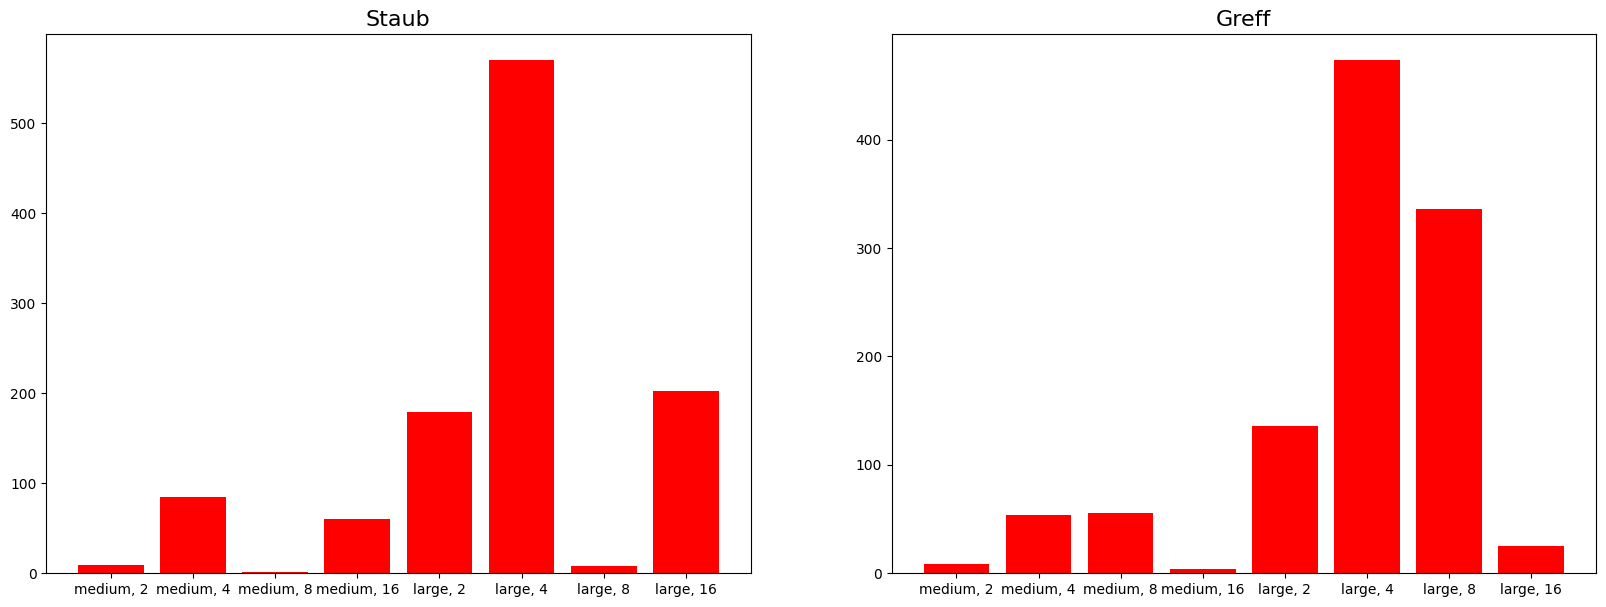

In [67]:
fig = plt.figure(figsize = (20, 7))
plt.subplot(1, 2, 1)
plt.title("Staub", fontsize=16)
plt.bar(label, dados_media, color="red")
plt.subplot(1, 2, 2)
plt.title("Greff", fontsize=16)
plt.bar(label2, dados_media2, color="red")
plt.show()

<Figure size 1700x700 with 0 Axes>

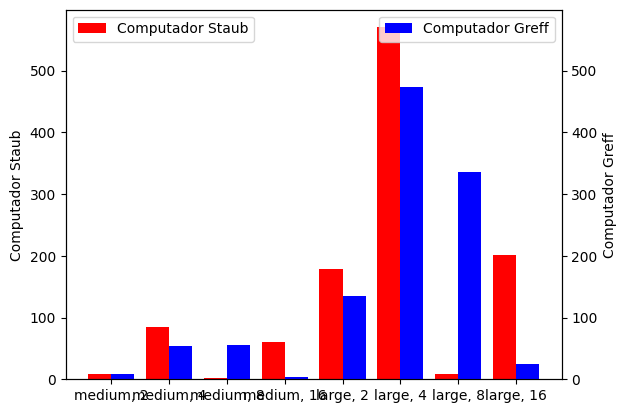

In [83]:
width = 0.4

fig = plt.figure(figsize = (17, 7))

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
figure, left_ax = plt.subplots()
left_bars = left_ax.bar(label, dados_media, color='red', width=-width, align='edge', label='Computador Staub')
left_ax.set_ylabel('Computador Staub')

right_ax = left_ax.twinx()
right_bars = right_ax.bar(label2, dados_media2, color='blue', width=width, align='edge', label='Computador Greff')
right_ax.set_ylabel('Computador Greff')

# Defina os limites do eixo direito para corresponder aos dados do eixo esquerdo
right_ax.set_ylim(left_ax.get_ylim())

# Adicione legendas para as barras vermelhas e azuis
left_legend = plt.legend(handles=[left_bars], loc='upper left')
right_legend = plt.legend(handles=[right_bars], loc='upper right')

# Adicione as duas legendas ao mesmo tempo
plt.gca().add_artist(left_legend)

plt.show()